## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.


В качестве анализируемых данных были взяты данные по трендам американского сегмента youtube
https://www.kaggle.com/datasnaek/youtube-new?select=US_category_id.json
https://www.kaggle.com/datasnaek/youtube-new/data?select=USvideos.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6


In [3]:
with open('US_category_id.json') as js_f:
    meta_data = json.load(js_f)
id_dict = {}
for i in range(1,45):
    id_dict[str(i)] = 'Not classified'
for dicts in meta_data['items']:
    id_dict[dicts['id']] = dicts['snippet']['title']
id_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '3': 'Not classified',
 '4': 'Not classified',
 '5': 'Not classified',
 '6': 'Not classified',
 '7': 'Not classified',
 '8': 'Not classified',
 '9': 'Not classified',
 '10': 'Music',
 '11': 'Not classified',
 '12': 'Not classified',
 '13': 'Not classified',
 '14': 'Not classified',
 '15': 'Pets & Animals',
 '16': 'Not classified',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [4]:
tube_data = pd.read_csv('USvideos.csv');
tube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
# в столбце 'category_id' заменим id на полное название категории
tube_data['category_id'] = tube_data['category_id'].apply(lambda x: id_dict[str(x)])
tube_data.rename(columns={'category_id':'category'}, inplace=True)

<AxesSubplot:title={'center':'Просмотры для каждой категории видео'}, xlabel='Категория', ylabel='Кол-во просмотров'>

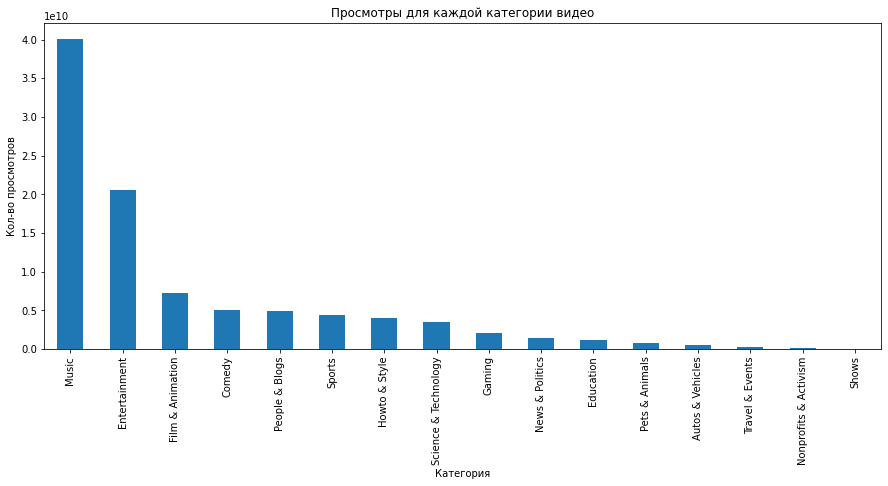

In [35]:
# Столбцовая диаграмма просмотров различных категорий видео за все время
tube_data.groupby('category').sum().sort_values(by='views', ascending=False)['views'].plot(kind='bar',
                                                                                           xlabel='Категория',
                                                                                           ylabel='Кол-во просмотров',
                                                                                           title = 'Просмотры для каждой категории видео')
# Из графика видно, что наибольшей популярностью в США пользуются музыкальные клипы, развлекательные,  фильмы и мультфильмы

Text(0.5, 1.0, 'Распределение музыкальных видео по числу просмотров')

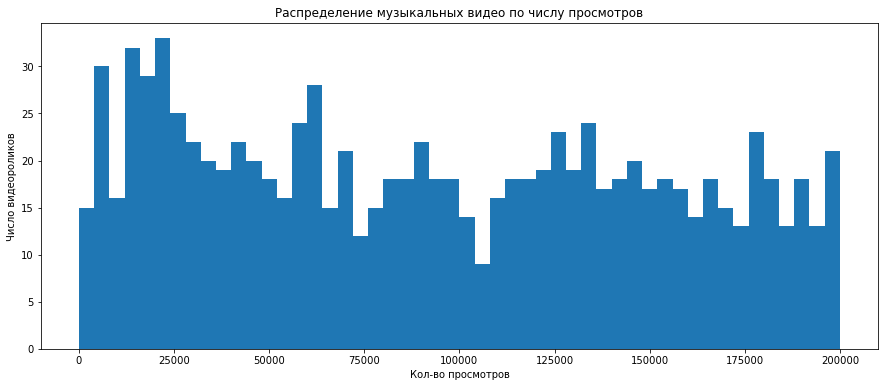

In [23]:
# Гистограмма распределения числа просмотров для определенного вида видеоконтента
tube_data[tube_data['category'] == 'Music']['views'].plot(kind='hist', bins=50, range=(0,200000))
plt.xlabel('Кол-во просмотров')
plt.ylabel('Число видеороликов')
plt.title('Распределение музыкальных видео по числу просмотров')
# График показывает, что четкого распеределения числа просмотров нет

Text(0.5, 1.0, 'Соотношение лайков и дизлайков в категории "Entertainment"')

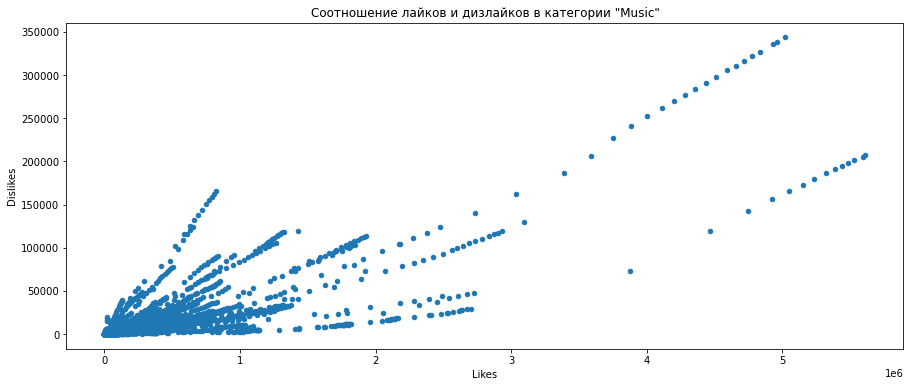

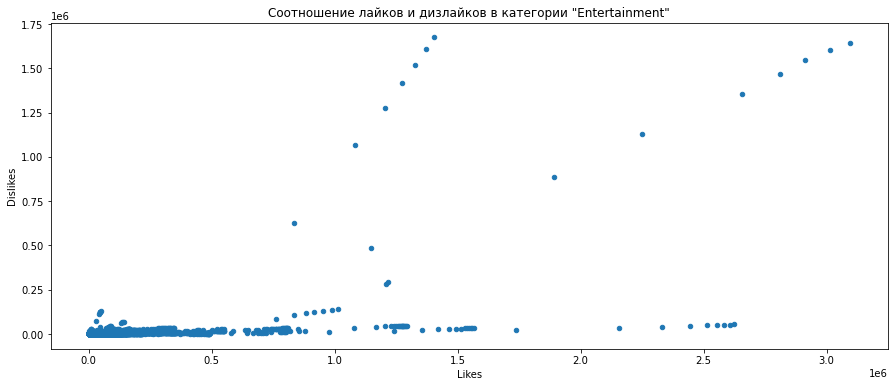

In [25]:
# Найдем соотношение числа лайков и дизлайков для категорий видео 'Music' и 'Entertainment'
tube_data[tube_data['category'] == 'Music'].plot(kind='scatter', x='likes',y='dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.title('Соотношение лайков и дизлайков в категории "Music"')
tube_data[tube_data['category'] == 'Entertainment'].plot(kind='scatter', x='likes',y='dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.title('Соотношение лайков и дизлайков в категории "Entertainment"')
# Из графиков видно, что при просмотре виде данных категорий люди склонны просматривать видео, которые им априори нравятся

In [27]:
# Сформируем таблицу по суммарному числу просмотров видео каждой категории за каждый день наблюдений
tube_time_data = tube_data.pivot_table(index='trending_date',columns='category',values='views',aggfunc=sum).fillna(0)
tube_time_data

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
trending_date,,,,,,,,,,,,,,,,
17.01.12,2788596.0,29459704.0,1114079.0,83837514.0,6247171.0,174855.0,10858408.0,63092795.0,8918091.0,1873.0,6425242.0,1870620.0,13185930.0,0.0,4947643.0,0.0
17.02.12,2655904.0,24083012.0,1036301.0,100519422.0,6746854.0,72700.0,5328146.0,38325548.0,7367157.0,2005.0,6783035.0,3730872.0,15040048.0,0.0,4802877.0,0.0
17.03.12,3217737.0,16837274.0,1094026.0,116831712.0,7554867.0,88588.0,5164442.0,59952048.0,7405817.0,2093.0,7480521.0,5131006.0,16415839.0,0.0,5093234.0,0.0
17.04.12,3652894.0,20043612.0,2776656.0,126880875.0,8167435.0,96043.0,12263141.0,74946299.0,7308575.0,0.0,8556309.0,6040839.0,11046954.0,0.0,2812344.0,341584.0
17.05.12,2404510.0,18387739.0,2605504.0,138551821.0,8581140.0,100269.0,21857851.0,89138602.0,7546406.0,0.0,9885482.0,1600104.0,12206286.0,0.0,2576643.0,420650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.30.04,0.0,26772261.0,13794127.0,186877103.0,57524763.0,20996646.0,40412611.0,385088816.0,7350897.0,0.0,32647789.0,3169437.0,9059989.0,0.0,31745208.0,2421477.0
18.30.05,0.0,36164679.0,9364512.0,163403287.0,90922579.0,40091416.0,31030843.0,576717511.0,20816302.0,302280.0,30505162.0,8543668.0,65995169.0,1294581.0,36885940.0,769914.0
18.31.01,105801.0,16354380.0,1524762.0,56670700.0,15490426.0,2724660.0,16991285.0,107009916.0,3900338.0,23742391.0,15283053.0,5312506.0,5864413.0,0.0,13811205.0,0.0


<AxesSubplot:title={'center':'Число просмотров фильмов/мультфильмов и комедий с весь период времени'}, xlabel='Дата', ylabel='Число просмотров'>

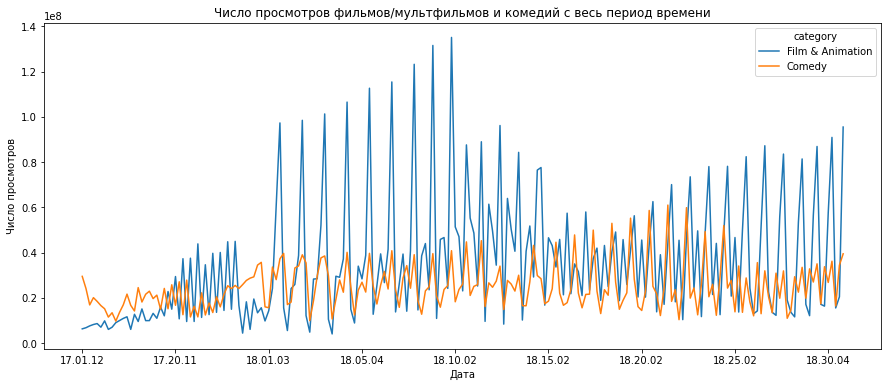

In [34]:
# Рассмотрим эволюцию количества просмотров видеороликов 'News & Politics' и 'Sports' за все время ведения наблюдений
tube_time_data[['Film & Animation', 'Comedy']].plot(xlabel = 'Дата', ylabel='Число просмотров', title='Число просмотров фильмов/мультфильмов и комедий с весь период времени')
# Таким образом, активнось просмотров в категории 'Film & Animation' повысилась в январе 18-го и увеличивалась до февраля, видимо сезонный всплеск
# В категории 'Comedy' наблюдается всплеск активности в феврале 18-го года, что, по всей видимости, связано с выходом более раскрученных комедий